In [2]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/heart_disease_uci.csv")

In [3]:
display(data.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [4]:
print(data.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [7]:
print(data.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


**Eksik verilerden trestbps,chol,thalch,oldpeak ve ca numeric değerler olduğu için mean ile fbs, restecg, exang, slope ve thal kategorik olduğu için mode ile doldururum ancak ca verisinin 920 satırından 611i eksik olduğu için onu silerim.**

In [9]:
numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])


data.drop(columns=['ca'], inplace=True)

# Temizlenmiş veriyi kontrol etme
print(data.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


<ipython-input-9-020c61b6ca7b>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])



--- trestbps Sütunu ---


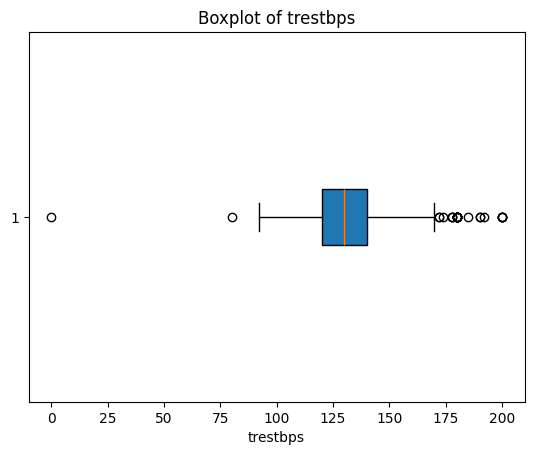

IQR: 20.0, Lower Bound: 90.0, Upper Bound: 170.0
Aykırı Değer Sayısı: 28
Z-Score ile Aykırı Değer Sayısı: 8


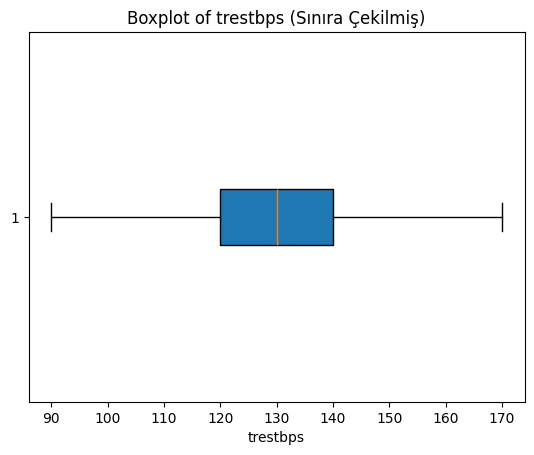


--- chol Sütunu ---


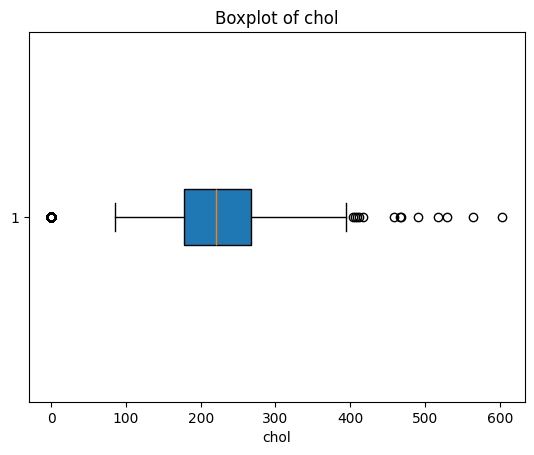

IQR: 89.25, Lower Bound: 43.875, Upper Bound: 400.875
Aykırı Değer Sayısı: 185
Z-Score ile Aykırı Değer Sayısı: 3


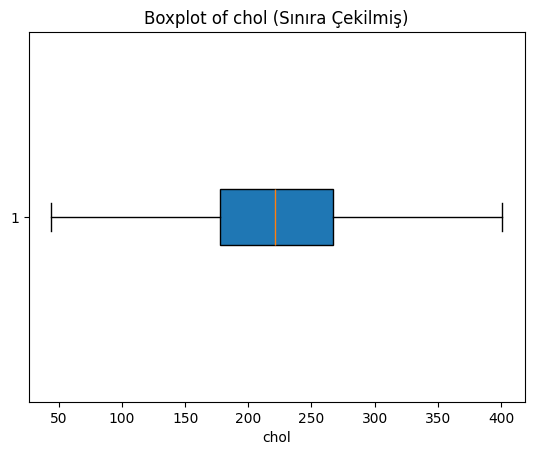


--- thalch Sütunu ---


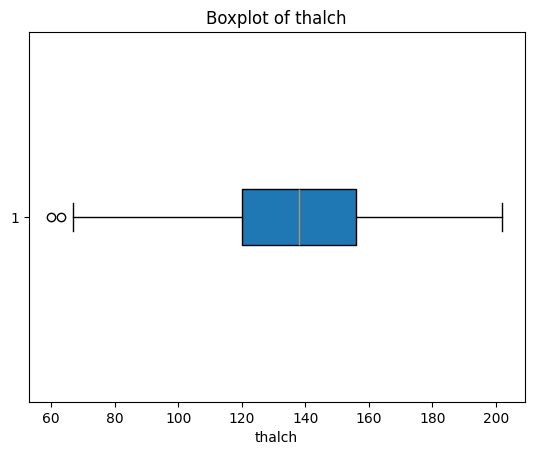

IQR: 36.0, Lower Bound: 66.0, Upper Bound: 210.0
Aykırı Değer Sayısı: 2
Z-Score ile Aykırı Değer Sayısı: 1


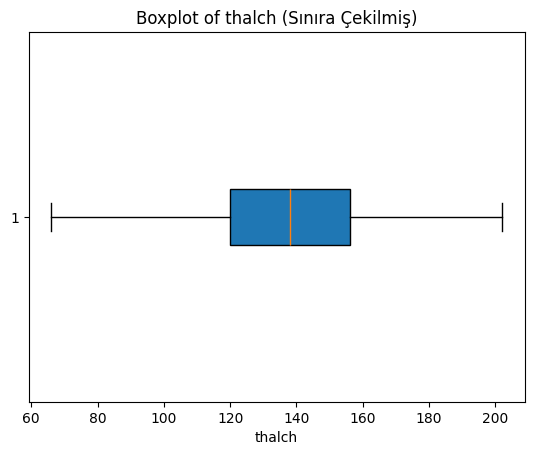


--- oldpeak Sütunu ---


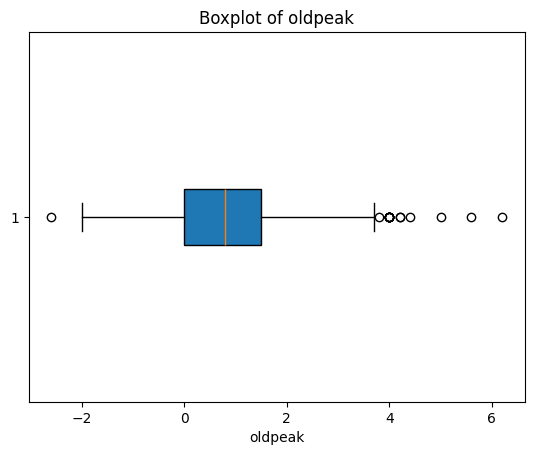

IQR: 1.5, Lower Bound: -2.25, Upper Bound: 3.75
Aykırı Değer Sayısı: 16
Z-Score ile Aykırı Değer Sayısı: 7


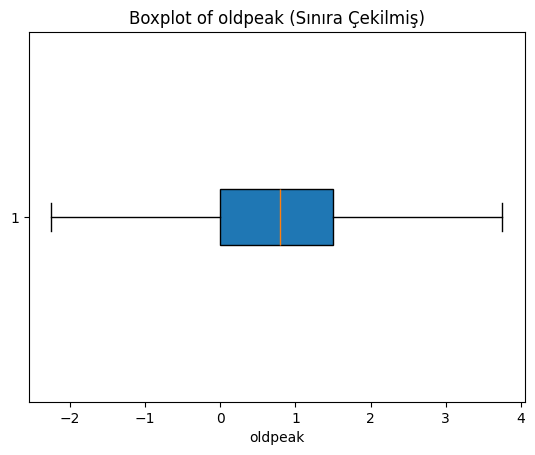

In [12]:
import numpy as np
import matplotlib.pyplot as plt #veri görselleştirme kütüphanesi
from scipy.stats import zscore

for col in numeric_columns:
    print(f"\n--- {col} Sütunu ---")

    # Eksik değer kontrolü ve doldurma
    if data[col].isnull().sum() > 0:
        print(f"{col} sütununda {data[col].isnull().sum()} eksik değer var. Dolduruluyor...")
        data[col].fillna(data[col].mean(), inplace=True)  # Eksik değerleri sütunun ortalaması ile doldur

    # Boxplot ile aykırı değerleri görselleştir
    plt.boxplot(data[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

    # IQR yöntemi ile aykırı değer analizi
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Aykırı Değer Sayısı: {len(outliers)}")

    # Z-Score yöntemi ile aykırı değer analizi
    z_scores = zscore(data[col])
    outliers_z = data[np.abs(z_scores) > 3]
    print(f"Z-Score ile Aykırı Değer Sayısı: {len(outliers_z)}")

    # Aykırı değerleri sınıra çek
    data[col] = data[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )

    # Sınıra çekilmiş veriyi tekrar görselleştir
    plt.boxplot(data[col].dropna(), vert=False, patch_artist=True)
    plt.title(f"Boxplot of {col} (Sınıra Çekilmiş)")
    plt.xlabel(col)
    plt.show()
